# India Air Quality Analysis and Prediction

## 1. Importing Required Libraries

In [1]:
import pandas as pd # For pandas operations
import matplotlib.pyplot as plt # For visualization
import numpy as np # For array operations
import seaborn as sns # For pair plot
from sklearn.model_selection import train_test_split # For splitting the dataset
import statsmodels.api as sm # For model summary
from sklearn.linear_model import LinearRegression # For linear regression 
from sklearn.tree import DecisionTreeRegressor # For decision tree regression
from sklearn.ensemble import RandomForestRegressor # For random forest regression
from sklearn.linear_model import LogisticRegression # For logistic regression
from sklearn.tree import DecisionTreeClassifier # For decision tree classification
from sklearn.ensemble import RandomForestClassifier # For random forest classification
from xgboost import XGBClassifier # For xgboost classification
from sklearn.neighbors import KNeighborsClassifier # For knn classification
from sklearn import metrics # For performance evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error # For model estimation
from sklearn.metrics import roc_auc_score, roc_curve # For roc_auc curve
import warnings # For disabling system warnings
warnings.filterwarnings("ignore")

## 2. Data Wrangling

In [2]:
# Reading the air quality dataset
air_quality_data = pd.read_csv("air_quality_data.csv", index_col=False, encoding='unicode_escape')
air_quality_data

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Displaying columns
air_quality_data.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [4]:
# Dataset description
air_quality_data.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [5]:
# Datatype information
air_quality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [6]:
# Displaying unique entries
air_quality_data.nunique()

stn_code                        803
sampling_date                  5485
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

In [7]:
# Displaying null values
air_quality_data.isna().sum().sort_values(ascending=False)

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
type                             5393
date                                7
sampling_date                       3
location                            3
state                               0
dtype: int64

In [8]:
# Estimating null value percentage 
((air_quality_data.isna().sum()/air_quality_data.isna().count())*100).sort_values(ascending=False)

pm2_5                          97.862497
spm                            54.478797
agency                         34.304933
stn_code                       33.064749
rspm                            9.230692
so2                             7.951035
location_monitoring_station     6.309009
no2                             3.725370
type                            1.237659
date                            0.001606
sampling_date                   0.000688
location                        0.000688
state                           0.000000
dtype: float64

In [9]:
# Handling missing categorical data
air_quality_data.state = air_quality_data.state.fillna(air_quality_data['state'].mode()[0])
air_quality_data.location = air_quality_data.location.fillna(air_quality_data['location'].mode()[0])
air_quality_data.agency = air_quality_data.agency.fillna(air_quality_data['agency'].mode()[0])
air_quality_data.type = air_quality_data.type.fillna(air_quality_data['type'].mode()[0])
air_quality_data.isna().sum().sort_values(ascending=False)

pm2_5                          426428
spm                            237387
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
date                                7
sampling_date                       3
state                               0
location                            0
agency                              0
type                                0
dtype: int64

In [10]:
# Handling missing numerical data
air_quality_data.fillna(0, inplace=True)
air_quality_data.isna().sum()

stn_code                       0
sampling_date                  0
state                          0
location                       0
agency                         0
type                           0
so2                            0
no2                            0
rspm                           0
spm                            0
location_monitoring_station    0
pm2_5                          0
date                           0
dtype: int64

In [11]:
coorelation_data = air_quality_data[["state", "location", "so2", "no2", "rspm", "spm", "pm2_5"]]
coorelation_data

,state,location,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,4.8,17.4,0.0,0.0,0.0
1,Andhra Pradesh,Hyderabad,3.1,7.0,0.0,0.0,0.0
2,Andhra Pradesh,Hyderabad,6.2,28.5,0.0,0.0,0.0
3,Andhra Pradesh,Hyderabad,6.3,14.7,0.0,0.0,0.0
4,Andhra Pradesh,Hyderabad,4.7,7.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,22.0,50.0,143.0,0.0,0.0
435738,West Bengal,ULUBERIA,20.0,46.0,171.0,0.0,0.0
435739,andaman-and-nicobar-islands,Guwahati,0.0,0.0,0.0,0.0,0.0
435740,Lakshadweep,Guwahati,0.0,0.0,0.0,0.0,0.0


In [12]:
coorelation_data.corr().abs()

,so2,no2,rspm,spm,pm2_5
so2,1.000000,0.369450,0.097568,0.105536,0.019861
no2,0.369450,1.000000,0.317282,0.191618,0.018202
rspm,0.097568,0.317282,1.000000,0.196845,0.032407
spm,0.105536,0.191618,0.196845,1.000000,0.078646
pm2_5,0.019861,0.018202,0.032407,0.078646,1.000000


In [13]:
# Estimating upper traingular matrix
coorelation_data.corr().abs().where(np.triu(np.ones(coorelation_data.corr().abs().shape),k=1).astype(np.bool))

,so2,no2,rspm,spm,pm2_5
so2,NaN,0.36945,0.097568,0.105536,0.019861
no2,NaN,NaN,0.317282,0.191618,0.018202
rspm,NaN,NaN,NaN,0.196845,0.032407
spm,NaN,NaN,NaN,NaN,0.078646
pm2_5,NaN,NaN,NaN,NaN,NaN


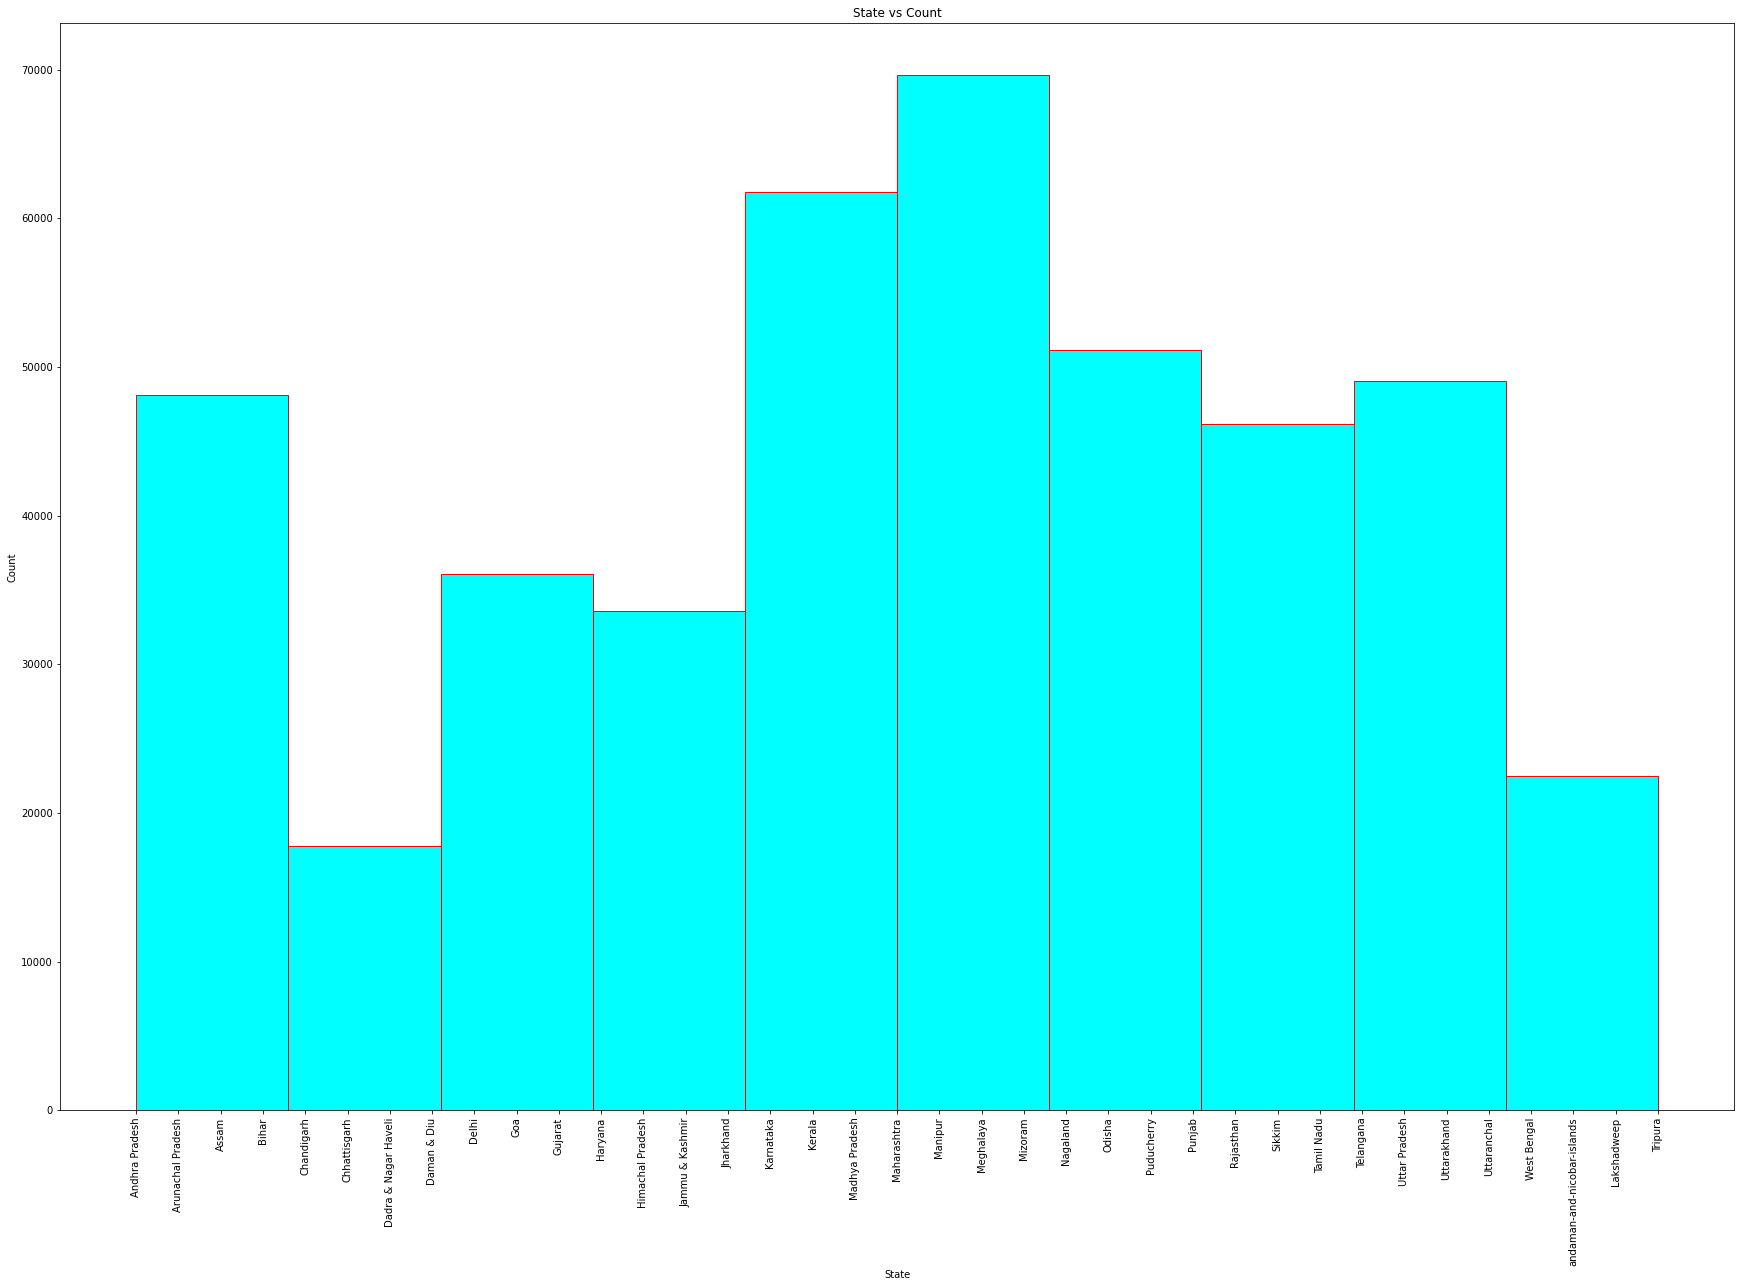

In [14]:
# Visualizing state count
plot_state = plt.figure(figsize=(30, 20))
plot_state = plt.xticks(rotation=90)

plot_state = plt.hist(air_quality_data.state, color = "aqua", ec="red")
plot_state = plt.xlabel('State')
plot_state = plt.ylabel('Count')
plot_state = plt.title('State vs Count')
plot_state = plt.rcParams.update({"font.size":30})

plot_state

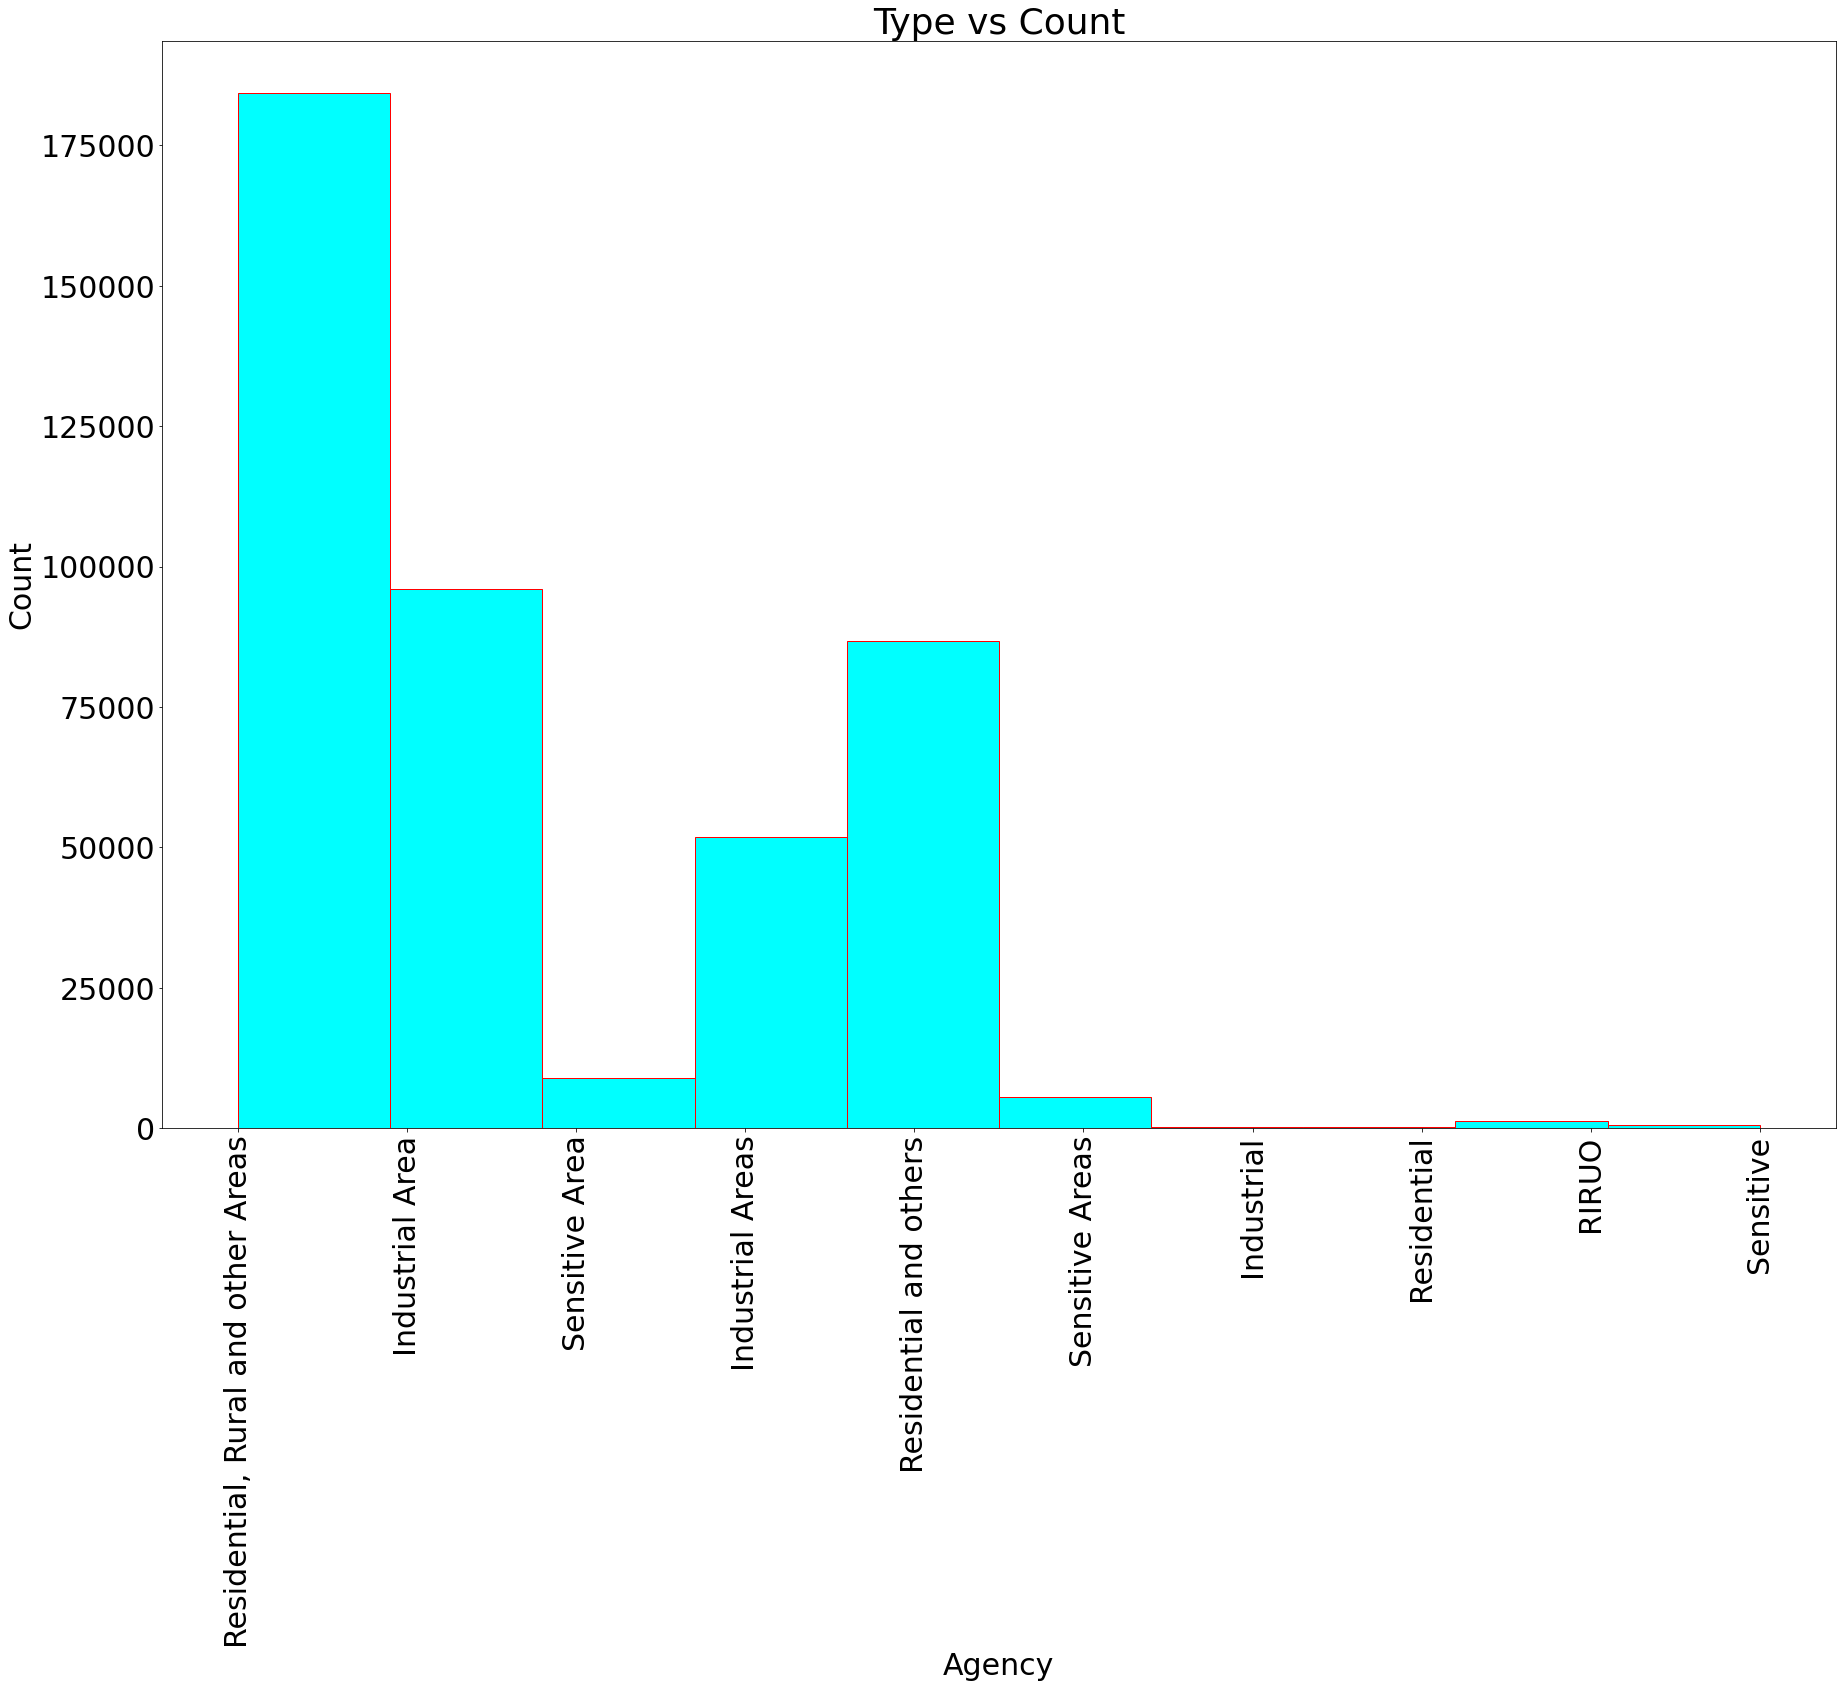

In [15]:
plot_type = plt.figure(figsize=(30, 20))
plot_type = plt.xticks(rotation=90)

plot_type = plt.hist(air_quality_data.type.astype(str), color = "aqua", ec="red")
plot_type = plt.xlabel('Agency')
plot_type = plt.ylabel('Count')
plot_type = plt.title('Type vs Count')
plot_type = plt.rcParams.update({"font.size":30})
plot_type

In [16]:
# Finding states with a large spm count
state_spm = air_quality_data[['spm','state']].groupby(["state"]).mean().sort_values(by='spm')
state_spm

,spm
state,
andaman-and-nicobar-islands,0.000000
Arunachal Pradesh,0.000000
Lakshadweep,0.000000
Tripura,0.000000
Telangana,0.000000
Jammu & Kashmir,14.461598
Meghalaya,16.560083
Uttarakhand,20.335880
Mizoram,22.410828


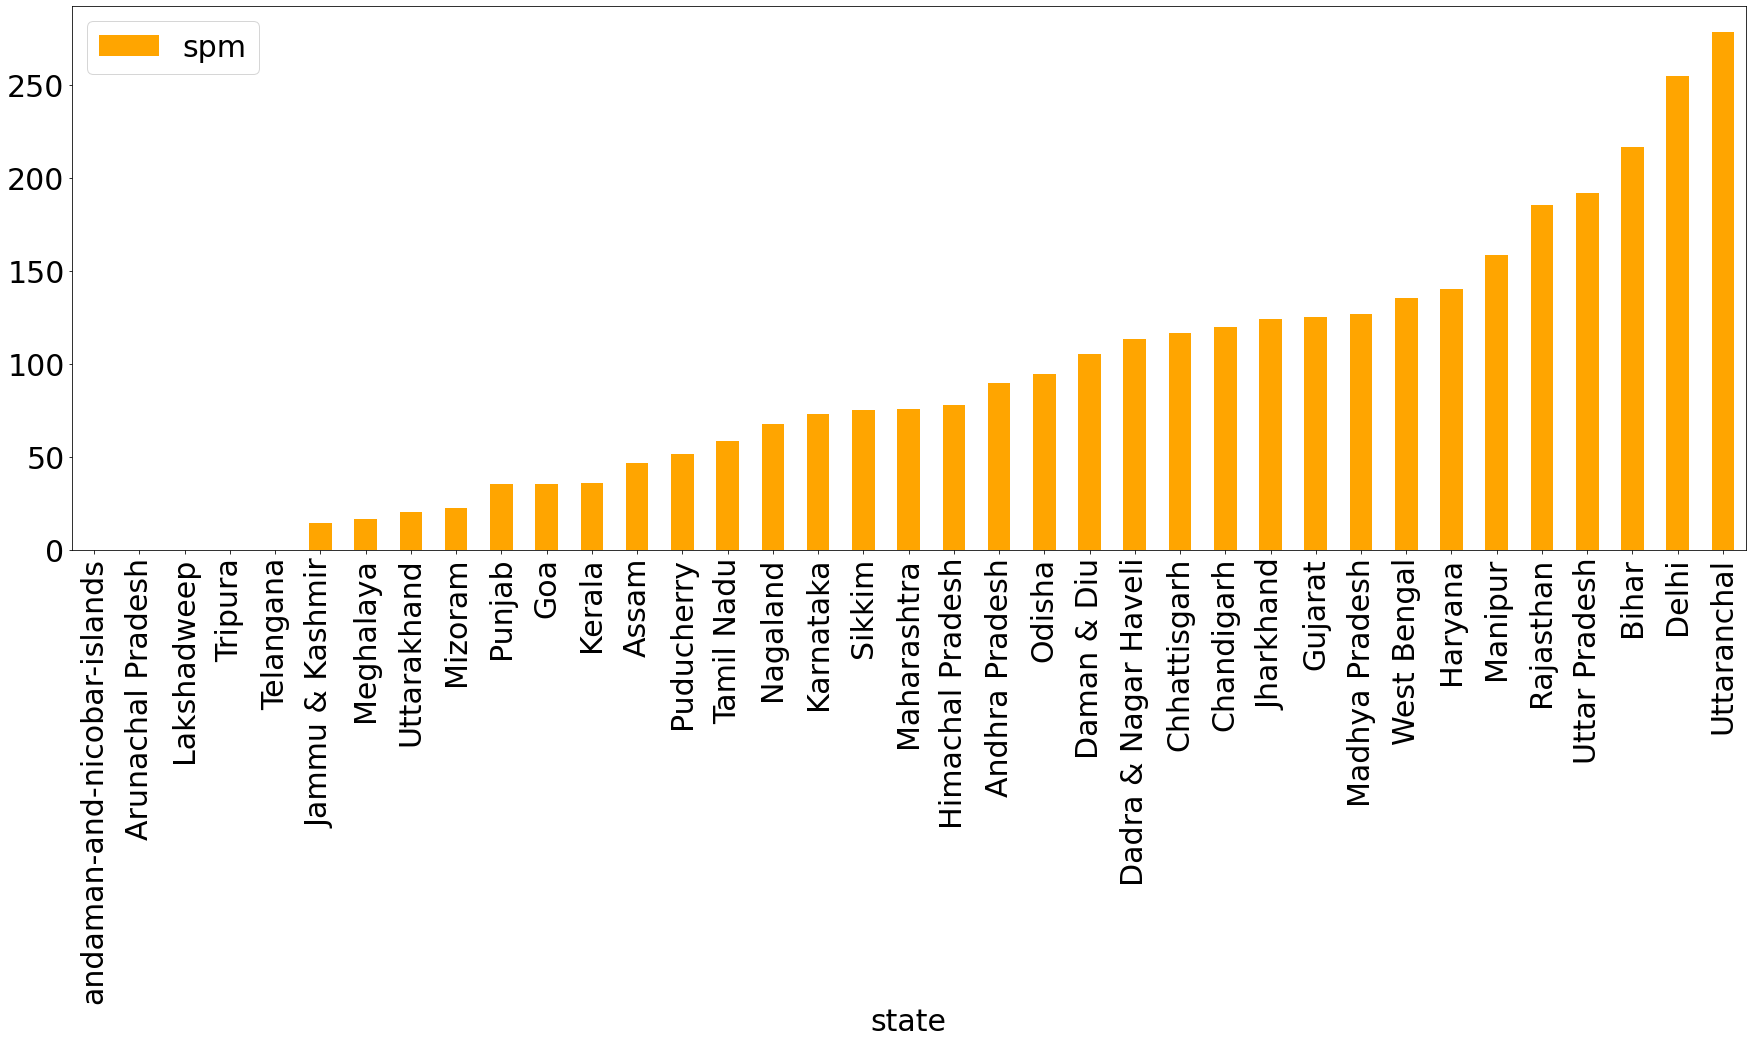

In [17]:
# Visualizing spm levels
plt.rcParams['figure.figsize']=(30,10)
state_spm.plot.bar(color='orange')
plt.show()

In [18]:
# Finding states with a large no2 count
state_no2 = air_quality_data[['no2','state']].groupby(["state"]).mean().sort_values(by='no2')
state_no2

,no2
state,
andaman-and-nicobar-islands,0.000000
Tripura,0.000000
Lakshadweep,0.000000
Arunachal Pradesh,4.011111
Mizoram,6.036236
Nagaland,8.140813
Meghalaya,9.826960
Goa,11.607557
Jammu & Kashmir,12.004732


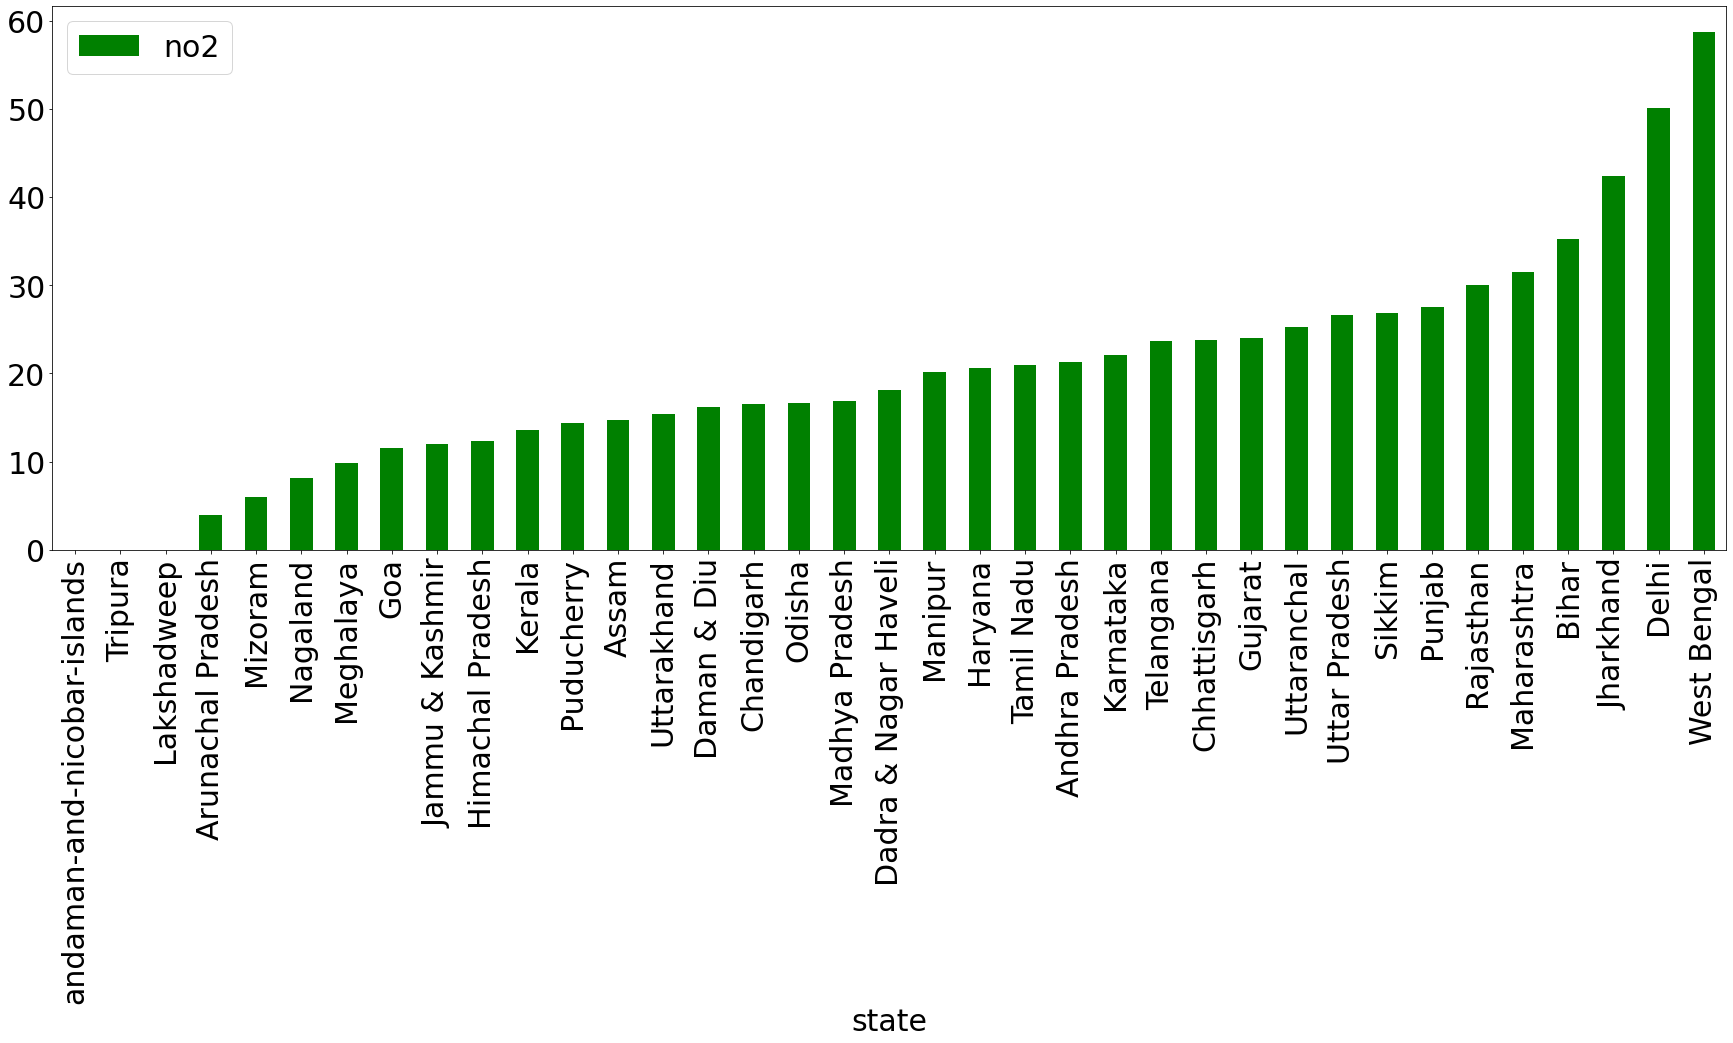

In [19]:
# Visualizing no2 levels
plt.rcParams['figure.figsize']=(30,10)
state_no2.plot.bar(color='green')
plt.show()

In [20]:
# Finding states with a large so2 count
state_so2= air_quality_data[['so2','state']].groupby(["state"]).mean().sort_values(by='so2')
state_so2

,so2
state,
andaman-and-nicobar-islands,0.000000
Tripura,0.000000
Lakshadweep,0.000000
Manipur,1.282895
Nagaland,1.331344
Chandigarh,1.388451
Mizoram,1.701052
Himachal Pradesh,1.932816
Arunachal Pradesh,2.366667


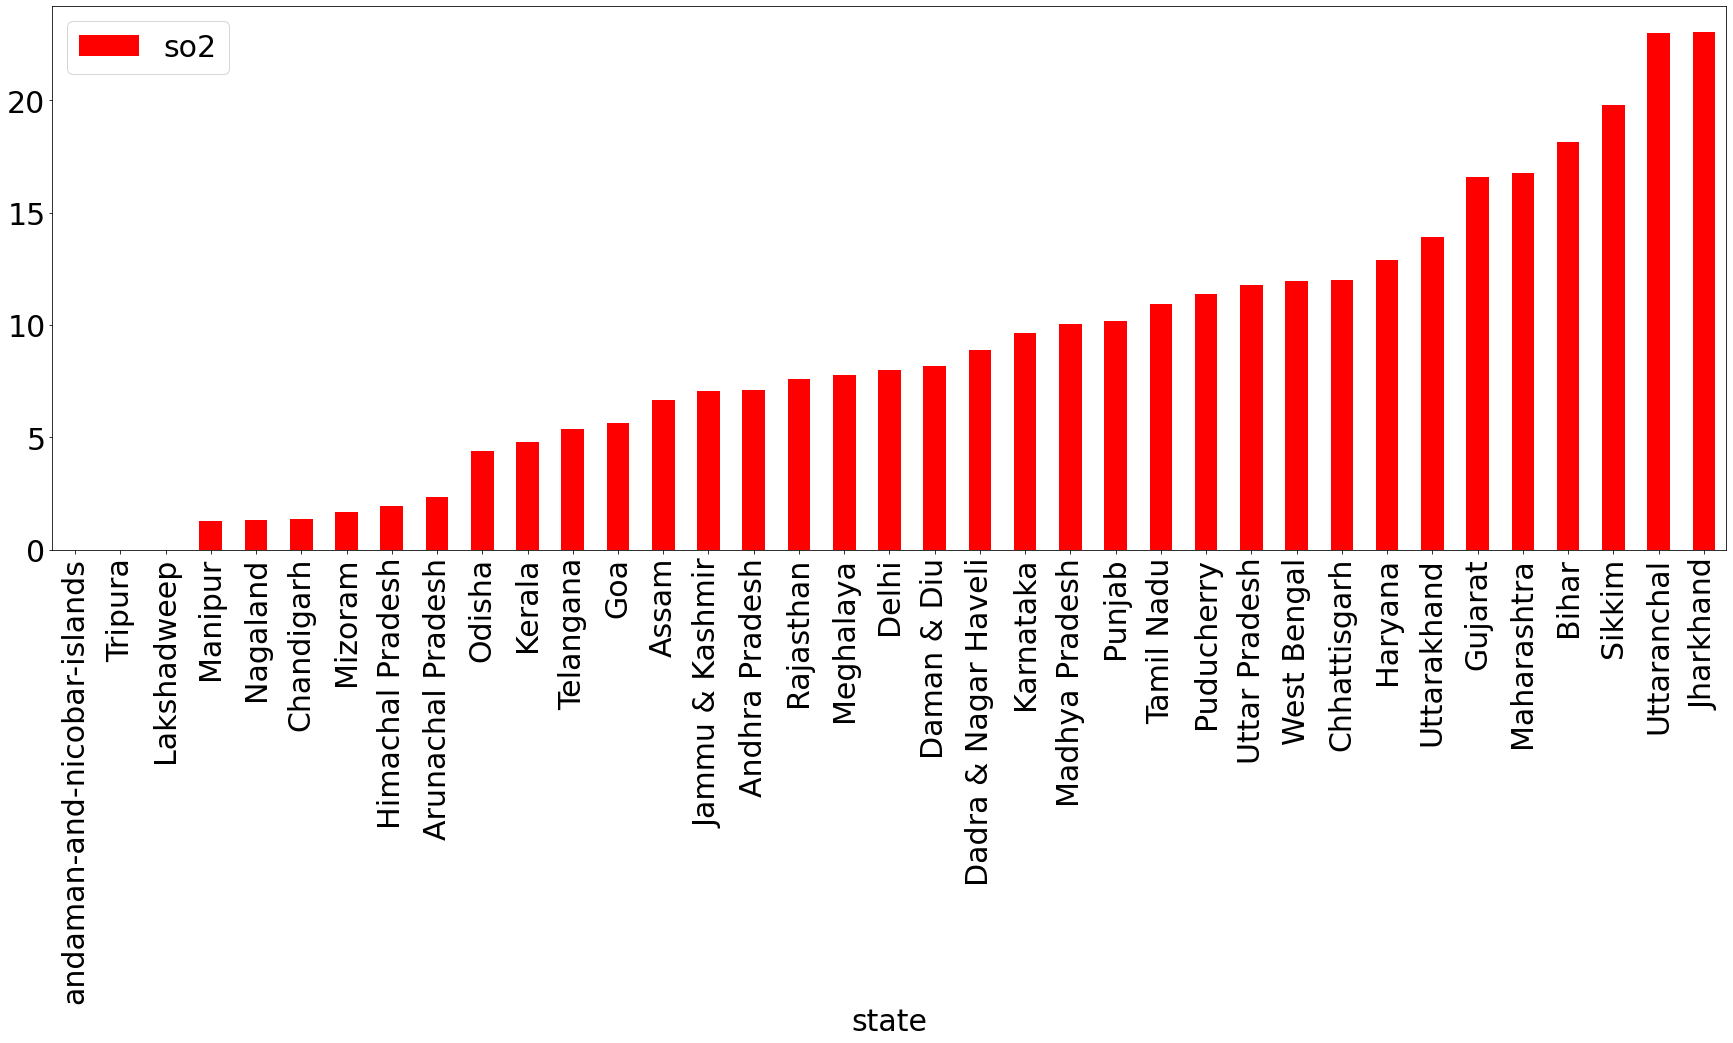

In [21]:
# Visualizing so2 levels
plt.rcParams['figure.figsize']=(30,10)
state_so2.plot.bar(color='red')
plt.show()

In [22]:
# Judging from the data, only state, location, type, so2, no2, rspm, spm, and pm2_5 seems significant
air_quality_data = air_quality_data[["so2", "no2", "rspm", "spm", "pm2_5"]]
air_quality_data

,so2,no2,rspm,spm,pm2_5
0,4.8,17.4,0.0,0.0,0.0
1,3.1,7.0,0.0,0.0,0.0
2,6.2,28.5,0.0,0.0,0.0
3,6.3,14.7,0.0,0.0,0.0
4,4.7,7.5,0.0,0.0,0.0
...,...,...,...,...,...
435737,22.0,50.0,143.0,0.0,0.0
435738,20.0,46.0,171.0,0.0,0.0
435739,0.0,0.0,0.0,0.0,0.0
435740,0.0,0.0,0.0,0.0,0.0


In [23]:
# Estimate so2 index
def calculate_so2(value):
    if value <= 40:
        return value * 50 / 40
    elif value <= 80:
        return 50 + (value - 40) * 50 / 40
    elif value <= 380:
        return 100 + (value - 80) * 100 / 300
    elif value <= 800:
        return 200 + (value - 380) * 100 / 420
    elif value <= 1600:
        return 300 + (value - 800) * 100 / 800
    elif value > 1600:
        return 400 + (value - 1600) * 100 / 800
    else:
        return 0

air_quality_data["so2_index"] = air_quality_data["so2"].apply(calculate_so2)
air_quality_data

,so2,no2,rspm,spm,pm2_5,so2_index
0,4.8,17.4,0.0,0.0,0.0,6.000
1,3.1,7.0,0.0,0.0,0.0,3.875
2,6.2,28.5,0.0,0.0,0.0,7.750
3,6.3,14.7,0.0,0.0,0.0,7.875
4,4.7,7.5,0.0,0.0,0.0,5.875
...,...,...,...,...,...,...
435737,22.0,50.0,143.0,0.0,0.0,27.500
435738,20.0,46.0,171.0,0.0,0.0,25.000
435739,0.0,0.0,0.0,0.0,0.0,0.000
435740,0.0,0.0,0.0,0.0,0.0,0.000


In [24]:
# Reference https://www.breeze-technologies.de/blog/what-is-an-air-quality-index-how-is-it-calculated/
# Estimate no2 index
def calculate_no2(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

air_quality_data["no2_index"] = air_quality_data["no2"].apply(calculate_no2)
air_quality_data

,so2,no2,rspm,spm,pm2_5,so2_index,no2_index
0,4.8,17.4,0.0,0.0,0.0,6.000,21.750
1,3.1,7.0,0.0,0.0,0.0,3.875,8.750
2,6.2,28.5,0.0,0.0,0.0,7.750,35.625
3,6.3,14.7,0.0,0.0,0.0,7.875,18.375
4,4.7,7.5,0.0,0.0,0.0,5.875,9.375
...,...,...,...,...,...,...,...
435737,22.0,50.0,143.0,0.0,0.0,27.500,62.500
435738,20.0,46.0,171.0,0.0,0.0,25.000,57.500
435739,0.0,0.0,0.0,0.0,0.0,0.000,0.000
435740,0.0,0.0,0.0,0.0,0.0,0.000,0.000


In [25]:
# Estimate rspm index
def calculate_rspm(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 400:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0
    
air_quality_data["rspm_index"] = air_quality_data["rspm"].apply(calculate_rspm)
air_quality_data

,so2,no2,rspm,spm,pm2_5,so2_index,no2_index,rspm_index
0,4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.000000
1,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.000000
2,6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.000000
3,6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.000000
4,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.000000
...,...,...,...,...,...,...,...,...
435737,22.0,50.0,143.0,0.0,0.0,27.500,62.500,317.692308
435738,20.0,46.0,171.0,0.0,0.0,25.000,57.500,339.230769
435739,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000000
435740,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000000


In [26]:
# Estimate spm index
def calculate_spm(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250) * 100 / 100
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 400:
        return 400 + (x - 430) * 100 / 430
    else:
        return 0

air_quality_data["spm_index"] = air_quality_data["spm"].apply(calculate_spm)
air_quality_data

,so2,no2,rspm,spm,pm2_5,so2_index,no2_index,rspm_index,spm_index
0,4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.000000,0.0
1,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.000000,0.0
2,6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.000000,0.0
3,6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.000000,0.0
4,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
435737,22.0,50.0,143.0,0.0,0.0,27.500,62.500,317.692308,0.0
435738,20.0,46.0,171.0,0.0,0.0,25.000,57.500,339.230769,0.0
435739,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000000,0.0
435740,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000000,0.0


In [27]:
# Estimate aqi index
def calculate_aqi(so2_index, no2_index, rspm_index, spm_index):
    if(so2_index>no2_index and so2_index>rspm_index and so2_index>spm_index):
        return so2_index
    elif(no2_index>so2_index and no2_index>rspm_index and no2_index>spm_index):
        return no2_index
    elif(rspm_index>so2_index and rspm_index>no2_index and rspm_index>spm_index):
        return rspm_index
    elif(spm_index>so2_index and spm_index>no2_index and spm_index>rspm_index):
        return spm_index
    else: return 0
    
air_quality_data["aqi"] = air_quality_data.apply(lambda x:calculate_aqi(x["so2_index"], x["no2_index"], x["rspm_index"], x["spm_index"]), axis=1)
air_quality_data

,so2,no2,rspm,spm,pm2_5,so2_index,no2_index,rspm_index,spm_index,aqi
0,4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.000000,0.0,21.750000
1,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.000000,0.0,8.750000
2,6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.000000,0.0,35.625000
3,6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.000000,0.0,18.375000
4,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.000000,0.0,9.375000
...,...,...,...,...,...,...,...,...,...,...
435737,22.0,50.0,143.0,0.0,0.0,27.500,62.500,317.692308,0.0,317.692308
435738,20.0,46.0,171.0,0.0,0.0,25.000,57.500,339.230769,0.0,339.230769
435739,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000000,0.0,0.000000
435740,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000000,0.0,0.000000


In [28]:
# Assign aqi label
def aqi_label(x):
    if x<=25:
        return "Excellent"
    elif x>25 and x<=50:
        return "Good"
    elif x>50 and x<=120:
        return "Moderate"
    elif x>120 and x<=350:
        return "Poor"
    elif x>350 and x<=500:
        return "Very Poor"
    elif x>500:
        return "Severe"
    
air_quality_data["aqi_label"] = air_quality_data["aqi"].apply(aqi_label)
air_quality_data

,so2,no2,rspm,spm,pm2_5,so2_index,no2_index,rspm_index,spm_index,aqi,aqi_label
0,4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.000000,0.0,21.750000,Excellent
1,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.000000,0.0,8.750000,Excellent
2,6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.000000,0.0,35.625000,Good
3,6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.000000,0.0,18.375000,Excellent
4,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.000000,0.0,9.375000,Excellent
...,...,...,...,...,...,...,...,...,...,...,...
435737,22.0,50.0,143.0,0.0,0.0,27.500,62.500,317.692308,0.0,317.692308,Poor
435738,20.0,46.0,171.0,0.0,0.0,25.000,57.500,339.230769,0.0,339.230769,Poor
435739,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000000,0.0,0.000000,Excellent
435740,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000000,0.0,0.000000,Excellent


In [29]:
# Determine aqi label count
air_quality_data["aqi_label"].value_counts().sort_values(ascending=False)

Poor         236787
Moderate     110486
Very Poor     51297
Good          24033
Excellent     10412
Severe         2727
Name: aqi_label, dtype: int64

## 3. Regression

In [30]:
# Creating training and testing datasets
train = air_quality_data[["so2_index", "no2_index", "rspm_index", "spm_index"]]
test = air_quality_data["aqi"]

In [31]:
# Splitting the training and testing datasets
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=test_size, random_state=0)

In [32]:
# Displaying model summary
ols = sm.OLS(test, train).fit()
print(ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                    aqi   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                          1.966e+06
Date:                Fri, 24 Jun 2022   Prob (F-statistic):                        0.00
Time:                        23:07:26   Log-Likelihood:                     -2.3575e+06
No. Observations:              435742   AIC:                                  4.715e+06
Df Residuals:                  435738   BIC:                                  4.715e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [33]:
# Comparing different regression models
def compare_model(X_train, X_test, y_train, y_test):
    
    # Linear regression model
    linear_regression = LinearRegression()
    linear_regression.fit(X_train, y_train)
    linear_regression_prediction = linear_regression.predict(X_test)
    print("Linear Regression:")
    print("\nCoefficients: ", linear_regression.coef_)
    print("\nMean Absolute Error: ", metrics.mean_absolute_error(y_test, linear_regression_prediction) )
    print("Mean Square Error: ", metrics.mean_squared_error(y_test, linear_regression_prediction))
    print("Root Mean Square Error: ", np.sqrt(metrics.mean_squared_error(y_test, linear_regression_prediction)))
    print('R-Squared:', linear_regression.score(X_test, y_test))
    
    # Decision tree model
    descision_tree = DecisionTreeRegressor()
    descision_tree.fit(X_train, y_train)
    descision_tree_prediction = descision_tree.predict(X_test)
    print("\n\nDecision Tree:")
    print("\nMean Absolute Error: ", metrics.mean_absolute_error(y_test, descision_tree_prediction) )
    print("Mean Square Error: ", metrics.mean_squared_error(y_test, descision_tree_prediction))
    print("Root Mean Square Error: ", np.sqrt(metrics.mean_squared_error(y_test, descision_tree_prediction)))
    print('R-Squared:', descision_tree.score(X_test, y_test))
    
    # Random forest model
    random_forest = RandomForestRegressor()
    random_forest.fit(X_train, y_train)
    random_forest_prediction = random_forest.predict(X_test)
    print("\n\nRandom Forest:")
    print("\nMean Absolute Error: ", metrics.mean_absolute_error(y_test, random_forest_prediction) )
    print("Mean Square Error: ", metrics.mean_squared_error(y_test, random_forest_prediction))
    print("Root Mean Square Error: ", np.sqrt(metrics.mean_squared_error(y_test, random_forest_prediction)))
    print('R-Squared:', random_forest.score(X_test, y_test))
    

compare_model(X_train, X_test, y_train, y_test)

Linear Regression:

Coefficients:  [0.50741117 0.39965858 0.70592265 0.3844146 ]

Mean Absolute Error:  38.603295147132535
Mean Square Error:  2746.8624573816674
Root Mean Square Error:  52.41051857577511
R-Squared: 0.8122961020115025


Decision Tree:

Mean Absolute Error:  0.0891563538388602
Mean Square Error:  13.827355568881572
Root Mean Square Error:  3.7185152371452737
R-Squared: 0.9990551224972415


Random Forest:

Mean Absolute Error:  0.09519401069397564
Mean Square Error:  4.983992600169436
Root Mean Square Error:  2.2324857446732858
R-Squared: 0.9996594242146768


## 4. Classification

In [34]:
# Creating training and testing datasets
train = air_quality_data[["so2_index", "no2_index", "rspm_index", "spm_index"]]
test = air_quality_data["aqi_label"]

In [35]:
# Splitting the training and testing datasets
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=test_size, random_state=0)

In [36]:
# Comparing different regression models
def compare_model(X_train, X_test, y_train, y_test):
    
    # Logistic regression model
    logistic_regression = LogisticRegression()
    logistic_regression.fit(X_train, y_train)
    logistic_regression_prediction = logistic_regression.predict(X_test)
    logistic_regression_probability = logistic_regression.predict_proba(X_test)
    print("Logistic Regression:")
    print("\nCoefficients: ", logistic_regression.coef_)
    print('R-Squared:', logistic_regression.score(X_test, y_test))
    
    # Decision tree model
    descision_tree = DecisionTreeClassifier()
    descision_tree.fit(X_train, y_train)
    descision_tree_prediction = descision_tree.predict(X_test)
    descision_tree_probability = descision_tree.predict_proba(X_test)
    print("\n\nDecision Tree:")
    print('R-Squared:', descision_tree.score(X_test, y_test))
    
    # Random forest model
    random_forest = RandomForestClassifier()
    random_forest.fit(X_train, y_train)
    random_forest_prediction = random_forest.predict(X_test)
    random_forest_probability = random_forest.predict_proba(X_test)
    print("\n\nRandom Forest:")
    print('R-Squared:', random_forest.score(X_test, y_test))
    
    # XGBoost model
    xg_boost = XGBClassifier()
    xg_boost.fit(X_train, y_train)
    xg_boost_prediction = xg_boost.predict(X_test)
    xg_boost_probability = xg_boost.predict_proba(X_test)
    print("\n\nXGBoost:")
    print('R-Squared:', xg_boost.score(X_test, y_test))
    
    # Knn model
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    knn_prediction = knn.predict(X_test)
    knn_prediction_probability = knn.predict_proba(X_test)
    print("\n\nKNN:")
    print('R-Squared:', knn.score(X_test, y_test))
    
compare_model(X_train, X_test, y_train, y_test)

Logistic Regression:

Coefficients:  [[ 0.13586205 -0.0125871  -0.06702125 -0.06087632]
 [ 0.04619175  0.01846165 -0.00533153 -0.0002483 ]
 [ 0.03713891  0.01043049  0.01156837  0.01053896]
 [ 0.03238136 -0.00848787  0.02304762  0.01849016]
 [-0.24787077  0.0086987   0.01617101  0.01072339]
 [-0.0037033  -0.01651586  0.02156578  0.0213721 ]]
R-Squared: 0.6274197064797071


Decision Tree:
R-Squared: 0.9992197271339889


Random Forest:
R-Squared: 0.9990131843165154
[23:09:40] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBoost:
R-Squared: 0.9993344731436964


KNN:
R-Squared: 0.9944118693272441
